In [1]:
### Print not only the last line in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Figure size 40x40 with 0 Axes>

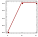

In [2]:
import sys
import numpy as np
from coffea import processor, nanoevents
import hist

import matplotlib.pyplot as plt

from plotters.pltStyle import pltStyle
# from scipy.interpolate import CubicSpline
pltStyle(style='hep')

#### some newer versions of pyplot and mplhep, aren't good friends with jupyter
#### To make the plots be formatted directly well, we need to make a dummy plot and rerun the import
### (a very silly solution)
plt.figure(num=None, figsize=(2, 2), dpi=20)
plt.plot([1,2,3],[1,3,3])
pltStyle('hep')
# plt.rcParams['figure.dpi'] = 120

In [14]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

from coffea.jetmet_tools import JetCorrectionUncertainty #FactorizedJetCorrector
from coffea.jetmet_tools import JECStack, CorrectedJetsFactory

from coffea.lookup_tools import extractor

events = NanoEventsFactory.from_root(
#     'root://cmsxrootd.fnal.gov///store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/230000/9EEE27FD-7337-424F-9D7C-A5427A991D07.root',
    'root://cmsxrootd.fnal.gov///store/mc/RunIISummer20UL18NanoAODv9/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/87DEE912-70CF-A549-B10B-1A229B256E88.root', #fileslist[0],
#     'root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/40000/BCB3E2FC-D575-0341-A211-5C9A8D8798B9.root',
#     'root://cmsxrootd.fnal.gov///store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_M-50_TuneCH3_13TeV-madgraphMLM-herwig7/NANOAODSIM/20UL18JMENano_HerwigJetPartonBugFix_106X_upgrade2018_realistic_v16_L1v1-v1/50000/A5653C07-C418-2442-B1F2-55688FC0CBED.root', #fileslist[0],
#     'root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/QCD_HT100to200_TuneCH3_13TeV-madgraphMLM-herwig7/NANOAODSIM/20UL18JMENano_HerwigJetPartonBugFix_106X_upgrade2018_realistic_v16_L1v1-v1/2810000/83549D8B-6ACE-7949-A83F-280A6FAC261D.root',
#     'root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/QCD_HT2000toInf_TuneCH3_13TeV-madgraphMLM-herwig7/NANOAODSIM/20UL18JMENano_HerwigJetPartonBugFix_106X_upgrade2018_realistic_v16_L1v1-v1/2810000/2C7AEDFF-AC07-DF44-9F84-CF0AF776108D.root',
#     'root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/QCD_HT50to100_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/80000/11C11D30-DFEE-CF41-A440-F0B250623B3E.root',
#     'root://cmsxrootd.fnal.gov///store/mc/RunIISummer20UL18NanoAODv9/QCD_HT100to200_TuneCH3_13TeV-madgraphMLM-herwig7/NANOAODSIM/20UL18JMENano_HerwigJetPartonBugFix_106X_upgrade2018_realistic_v16_L1v1-v1/2810000/83549D8B-6ACE-7949-A83F-280A6FAC261D.root',
#     'root://cmsxrootd.fnal.gov///store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/30000/0230241E-754C-954D-B5D5-C104C1550830.root',
#     'root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/2520000/C9B528C2-F9A0-5D48-851B-534BCA92532F.root',
#     'root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/30000/0230241E-754C-954D-B5D5-C104C1550830.root',
    schemaclass=NanoAODSchema.v6,
    entry_start=0,
    entry_stop=10000,
#      entrystart=195440, entrystop=202420
).events()
# events.keys()

240213 15:16:24 1013554 secgsi_ClientDoCert: could not instantiate session cipher using cipher public info from server
240213 15:16:25 1013554 secgsi_ClientDoCert: could not instantiate session cipher using cipher public info from server


In [15]:
from is_b_had import find_gluon_split_jets

In [ ]:
bin(gen_parts.statusFlags[0][0]>>1)
gen_parts.statusFlags[0][0]>>13&1

In [ ]:
bin(gen_parts.statusFlags[0][0]>>12)

In [ ]:
(195 % 10) == 5

In [127]:
def vectorial_is_b_bar(x):
    x = np.abs(x)
    x_mod_100 = x//100
    x_mod_1000 = x//1000
    res = np.zeros_like(x)
    test1 = x_mod_100 == 5
    test2 = x_mod_1000 == 5
    test3 = np.logical_and((x_mod_100>100), (x_mod_100 % 10)==5)
    return test1 | test2 | test3

bids = np.array([123, 525, -524, 5165, -5652, 19512, 19521, 0, 52, 1195])
vectorial_is_b_bar(bids)

array([False,  True,  True,  True,  True,  True,  True, False, False,
       False])

In [66]:
sum(ak.num(gen_parts[gen_parts.pt>1]))
gen_parts2 = gen_parts[np.abs(gen_parts.pdgId)>499]
sum(ak.num(gen_parts2[gen_parts2.pt>3]))
gen_parts3 = gen_parts2[gen_parts2.status==1]
sum(ak.num(gen_parts3))

gen_parts4 = gen_parts[gen_parts.statusFlags>>13&1]
sum(ak.num(gen_parts4))
# sum(ak.num(gen_parts))

34720

5393

0

39641

In [114]:
from is_b_had import find_gluon_split_jets, is_b_had

In [99]:
reco_jets = events.Jet
gen_jets = events.GenJet
selectedEvents = events
has_b_jet = ak.num(reco_jets[reco_jets.partonFlavour==5])>0
n_jets_per_event = ak.num(reco_jets)
# has_b_jet = [True]*len(selectedEvents) 
events_with_bs = selectedEvents[has_b_jet]
is_b_jet = reco_jets.partonFlavour==5
b_jets = reco_jets[is_b_jet][has_b_jet]

b_gluon_splitting = np.zeros(sum(n_jets_per_event), dtype=bool)
b_prompt = np.zeros(sum(n_jets_per_event), dtype=bool)
is_from_gluon_splitting, is_not_from_gluon_splitting = find_gluon_split_jets(events_with_bs.GenPart, b_jets)
b_gluon_splitting[ak.flatten(is_b_jet)] = ak.flatten(is_from_gluon_splitting)
b_prompt[ak.flatten(is_b_jet)] = ak.flatten(is_not_from_gluon_splitting)
a = ak.unflatten(b_gluon_splitting, n_jets_per_event)

bhads [[GenParticle, GenParticle, GenParticle, ... GenParticle, GenParticle, GenParticle]]
daughter_is_b [[[1], [1], [1], [0, 0], [1], [0, 0]], ... [0, 0]], [[1], [1], [1], [0], [0, 0, 0]]]


<Array [[False, False, ... False, False]] type='10000 * var * bool'>

In [105]:
gen_jets

<PtEtaPhiMCollectionArray [[{eta: -0.124, ... hadronFlavour: 0}]] type='10000 * ...'>

In [129]:
a = is_b_had(selectedEvents.GenPart.pdgId, ak.ArrayBuilder())
b = vectorial_is_b_bar(selectedEvents.GenPart.pdgId)

In [133]:
np.sum(np.logical_not(a == b))

0

In [109]:
reco_jets = events.Jet
gen_jets = events.GenJet
selectedEvents = events

shapes_jets = ak.num(reco_jets.pt)
masks = {}
has_b_jet = ak.num(reco_jets[reco_jets.partonFlavour==5])>0
# has_b_jet = [True]*len(selectedEvents) 
events_with_bs = selectedEvents[has_b_jet]
is_b_jet = reco_jets.partonFlavour==5
b_jets = reco_jets[is_b_jet][has_b_jet]
genparts = events_with_bs.GenPart[np.abs(events_with_bs.GenPart.pdgId)>499]
is_from_gluon_splitting, is_not_from_gluon_splitting = find_gluon_split_jets(genparts, b_jets)

b_gluon_splitting = np.zeros(sum(shapes_jets), dtype=bool)
b_gluon_splitting[ak.flatten(is_b_jet)] = ak.flatten(is_from_gluon_splitting)
b_prompt = np.zeros(sum(shapes_jets), dtype=bool)
b_prompt[ak.flatten(is_b_jet)] = ak.flatten(is_not_from_gluon_splitting)
masks['b_gluon_splitting'] = b_gluon_splitting
masks['b_prompt'] = b_prompt

has_bbar_jet = ak.num(reco_jets[reco_jets.partonFlavour==-5])>0
events_with_bbars = selectedEvents[has_bbar_jet]
is_bbar_jet = reco_jets.partonFlavour==-5
bbar_jets = reco_jets[is_bbar_jet][has_bbar_jet]
genparts = events_with_bbars.GenPart[np.abs(events_with_bbars.GenPart.pdgId)>499]
is_from_gluon_splitting, is_not_from_gluon_splitting = find_gluon_split_jets(genparts, bbar_jets)

bbar_gluon_splitting = np.zeros(sum(shapes_jets), dtype=bool)
bbar_gluon_splitting[ak.flatten(is_bbar_jet)] = ak.flatten(is_from_gluon_splitting)
bbar_prompt = np.zeros(sum(shapes_jets), dtype=bool)
bbar_prompt[ak.flatten(is_bbar_jet)] = ak.flatten(is_not_from_gluon_splitting)
masks['bbar_gluon_splitting'] = bbar_gluon_splitting
masks['bbar_prompt'] = bbar_prompt

bhads [[GenParticle, GenParticle, GenParticle, ... GenParticle, GenParticle, GenParticle]]
daughter_is_b [[[1], [1], [1], [0, 0], [1], [0, 0]], ... [0, 0]], [[1], [1], [1], [0], [0, 0, 0]]]
bhads [[GenParticle, GenParticle, GenParticle, ... GenParticle, GenParticle, GenParticle]]
daughter_is_b [[[1], [1], [1], [1], [0], [0, 0]], ... [0], [0, 0, 0]], [[1], [1], [0], [0, 0, 0]]]


In [ ]:
reco_jets = events.Jet
gen_jets = events.GenJet
selectedEvents = events

shapes_jets = ak.num(reco_jets.pt)
masks = {}
has_b_jet = ak.num(reco_jets[reco_jets.partonFlavour==5])>0
# has_b_jet = [True]*len(selectedEvents) 
events_with_bs = selectedEvents[has_b_jet]
is_b_jet = reco_jets.partonFlavour==5
b_jets = reco_jets[is_b_jet][has_b_jet]
genparts = events_with_bs.GenPart[np.abs(events_with_bs.GenPart.pdgId)>499]
is_from_gluon_splitting, is_not_from_gluon_splitting = find_gluon_split_jets(genparts, b_jets)

b_gluon_splitting = np.zeros(sum(shapes_jets), dtype=bool)
b_gluon_splitting[ak.flatten(is_b_jet)] = ak.flatten(is_from_gluon_splitting)
b_prompt = np.zeros(sum(shapes_jets), dtype=bool)
b_prompt[ak.flatten(is_b_jet)] = ak.flatten(is_not_from_gluon_splitting)
masks['b_gluon_splitting'] = b_gluon_splitting
masks['b_prompt'] = b_prompt

has_bbar_jet = ak.num(reco_jets[reco_jets.partonFlavour==-5])>0
events_with_bbars = selectedEvents[has_bbar_jet]
is_bbar_jet = reco_jets.partonFlavour==-5
bbar_jets = reco_jets[is_bbar_jet][has_bbar_jet]
genparts = events_with_bbars.GenPart[np.abs(events_with_bbars.GenPart.pdgId)>499]
is_from_gluon_splitting, is_not_from_gluon_splitting = find_gluon_split_jets(genparts, bbar_jets)

bbar_gluon_splitting = np.zeros(sum(shapes_jets), dtype=bool)
bbar_gluon_splitting[ak.flatten(is_bbar_jet)] = ak.flatten(is_from_gluon_splitting)
bbar_prompt = np.zeros(sum(shapes_jets), dtype=bool)
bbar_prompt[ak.flatten(is_bbar_jet)] = ak.flatten(is_not_from_gluon_splitting)
masks['bbar_gluon_splitting'] = bbar_gluon_splitting
masks['bbar_prompt'] = bbar_prompt

In [113]:
sum(masks['b_gluon_splitting'])
sum(masks['b_prompt'])

sum(masks['bbar_gluon_splitting'])
sum(masks['bbar_prompt'])

303

631

331

633

In [ ]:
has_b_jet = np.sum(np.abs(events.Jet.partonFlavour)==5, axis=1)>0
has_b_had = ak.num(bhads)>0

ak.sum(has_b_jet == has_b_had)
ak.sum((has_b_jet==1) & (has_b_had==0))
ak.sum((has_b_jet==0) & (has_b_had==1))
ak.sum((has_b_jet==1) & (has_b_had==1))
ak.sum((has_b_jet==0) & (has_b_had==0))

In [134]:
# # ak.sum(LHE_outgoing.pdgId == 21, axis=1)
# import mplhep as hep
# from helpers import legend_str_to_filename
# import os
# fig, ax = plt.subplots()
# n_glu = hist.new.Var([0,1,2,3]).Double()

# LHEPart = events.LHEPart
# absLHEid = np.abs(LHEPart.pdgId)
# LHE_outgoing = LHEPart[(LHEPart.status==1) & ((absLHEid < 6) | (absLHEid == 21))]
# n_glu.fill(ak.sum(LHE_outgoing.pdgId == 21, axis=1))

# n_glu.plot1d(histtype='fill', alpha=0.9, density=True)
# hep.cms.label("Private work", loc=0, data=False, ax=ax, rlabel='')
# ax.set_xlabel('Number of outgoing LHE gluons')
# ax.set_ylabel('Events')

# dir_name = 'plotters/fig/misc'
# if not os.path.exists(dir_name):
#     os.mkdir(dir_name)
    
# figname = dir_name+'/n_gluons_ttbar'
# ax.set_xticks([0,1,2,3])

# figname = legend_str_to_filename(figname)
# plt.savefig(figname+'.pdf');
# plt.savefig(figname+'.png');
# print(f'Figure saved: {figname}.pdf /.png')

# # h_jetpt = Hist(pt_gen_axis, pt_gen_scaled_axis)
# # h_jetpt.fill(ak.flatten(not_scaled_jets.pt), ak.flatten(scaled_jets.pt))
# 1;

Plot the flavor fractions of gluon split and not gluon split heavy flavor jets vs pt.

In [1]:
import sys
top_path = '../'
if top_path not in sys.path:
    sys.path.append(top_path)

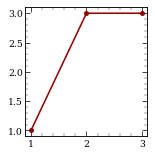

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from coffea import util
from helpers import hist_mult
from plotters.pltStyle import pltStyle
import mplhep as hep
pltStyle('hep')

#### some newer versions of pyplot and mplhep, aren't good friends with jupyter
#### To make the plots be formatted directly well, we need to make a dummy plot and rerun the import
### (a very silly solution)
plt.figure(num=None, figsize=(2, 2), dpi=80)
plt.plot([1,2,3],[1,3,3])
import matplotlib.pyplot as plt
pltStyle('hep', font_frac=1.05)
# pltStyle('hep') #, font_frac=1.35
# from collections.abc import Iterable
# %matplotlib notebook 
# %matplotlib notebook
1;

In [3]:
from helpers import sum_neg_pos_eta, rebin_hist, get_xsec_dict, get_flavor_antiflavor_list
from JetEtaBins import JetEtaBins, PtBins

from fileNames.available_datasets import dataset_dictionary

from fileNames.available_datasets import legend_labels
ttbarlab = legend_labels['ttbar']['lab']

from save_json import save_json_fractions, save_fractions_root, save_root

from uncertainty_helpers import get_output, sum_output, combine_flavors, get_spline, FlavorFractions
# from uncertainty_helpers import get_output, sum_output, combine_flavors, get_spline, FlavorFractions, create_data_HerPy_differences
from uncertainty_plotters import plot_Efractions, plot_Efractions_ratio #, plot_spectra, plot_ratio_comparisons_samples, plot_HerPydiff, plot_uncertainty, plot_uncertainty_antiflav

# from uncertainty_helpers import get_ratio, read_data2, read_corrections, ptmin_global, ptmax_global
# # from uncertainty_helpers import get_evaluator_limits, get_evaluator_limits_all_flav
# from RatioPlotFitRes import RatioPlotFitRes, CorrectionEvaluator, get_additional_uncertainty_curves
from scipy.interpolate import RegularGridInterpolator 

# from common_binning import JERC_Constants

Welcome to JupyROOT 6.28/04


In [4]:
use_corrections = 'ratio' ### Which corrections to use for deriving the uncertainties 'T' for ttbar, 'J' for QCD, 'ratio' for the combined ratio fit
### If to include unmatched in calculating the uncertainties with seperate fits and
### include them in the flavor fraction plots.
### If False, unmatched are ignored
# include_unmatched = False
# combine_antiflavour = True
# combine_antiflavour_txt = '_split_antiflav' if not combine_antiflavour else ''
add_composed_flav = True # if to also provide uncertainty for q as ud+s

eta_binning  = "HCalPart"  ### HCalPart, CoarseCalo, CaloTowers, one_bin, Summer20Flavor;       
                         ### HCalPart: bin in HCal sectors, CaloTowers: the standard JERC binning,
                         ### CoarseCalo: like 'CaloTowers' but many bins united;

In [5]:
jeteta_bins = JetEtaBins(eta_binning, absolute=True)
pt_bins = PtBins("MC_truth")
eta_binning_str = '_'+eta_binning if eta_binning != "HCalPart" else ''

In [6]:
samples = ['QCD']
Her_samples = ['QCD-MG-Py']
Py_samples = ['QCD-Py']

Her_legends = ['QCD MG+Py8']
Py_legends = ['QCD Py8']

Saving plot with the name =  fig/fractions/fraction_g_split_eta0p0to1p305_QCD-MG-Py_QCD-MG-Her .pdf /.png
Saving plot with the name =  fig/fractions/fraction_g_split_eta1p305to2p5_QCD-MG-Py_QCD-MG-Her .pdf /.png
Saving plot with the name =  fig/fractions/fraction_g_split_eta2p5to3p139_QCD-MG-Py_QCD-MG-Her .pdf /.png
Saving plot with the name =  fig/fractions/fraction_g_split_eta3p139to5p191_QCD-MG-Py_QCD-MG-Her .pdf /.png
Saving plot with the name =  fig/fractions/fraction_g_split_eta0p0to1p305_DY-MG-Py_DY-MG-Her .pdf /.png
Saving plot with the name =  fig/fractions/fraction_g_split_eta1p305to2p5_DY-MG-Py_DY-MG-Her .pdf /.png
Saving plot with the name =  fig/fractions/fraction_g_split_eta2p5to3p139_DY-MG-Py_DY-MG-Her .pdf /.png
Saving plot with the name =  fig/fractions/fraction_g_split_eta3p139to5p191_DY-MG-Py_DY-MG-Her .pdf /.png
Saving plot with the name =  fig/fractions/fraction_g_split_eta0p0to1p305_Pythia-TTBAR_Herwig-TTBAR .pdf /.png
Saving plot with the name =  fig/fractions/fr

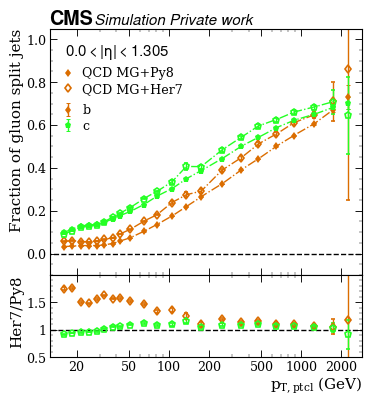

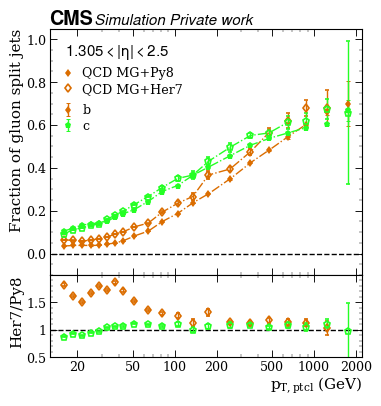

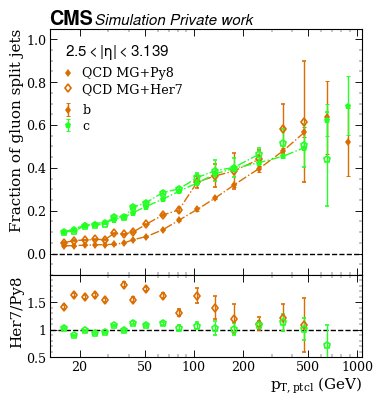

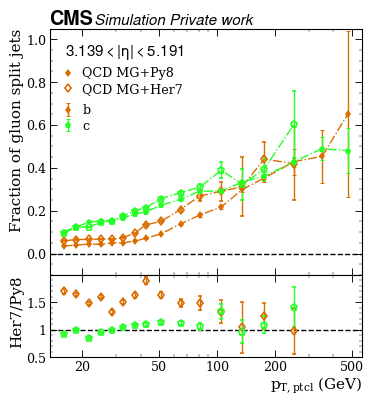

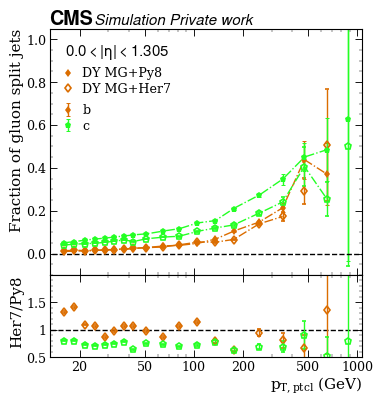

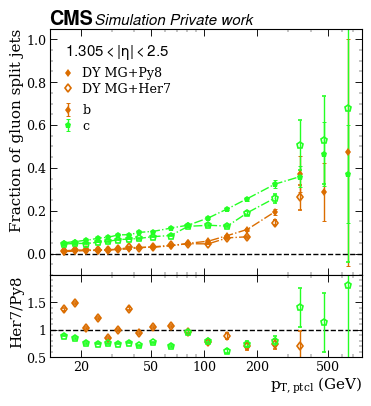

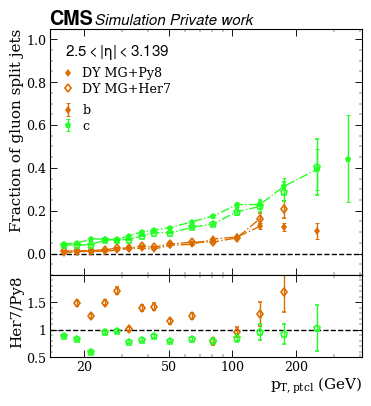

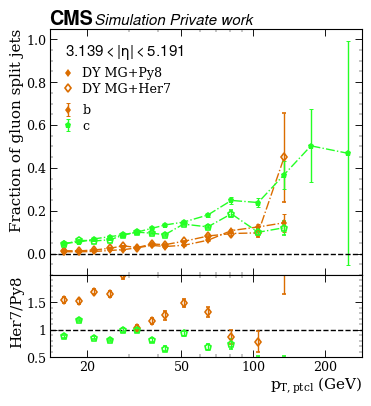

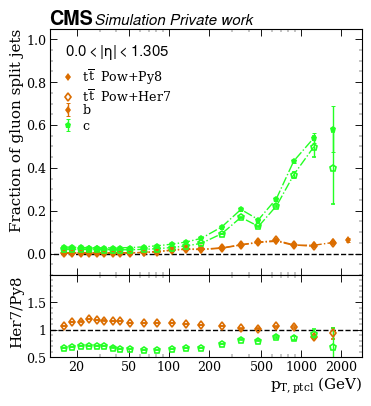

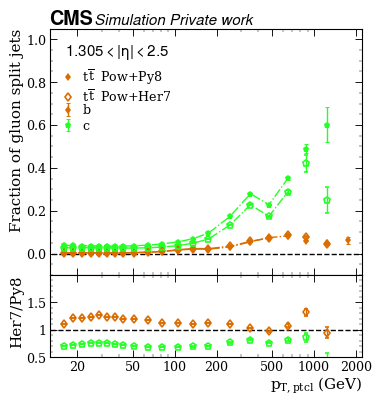

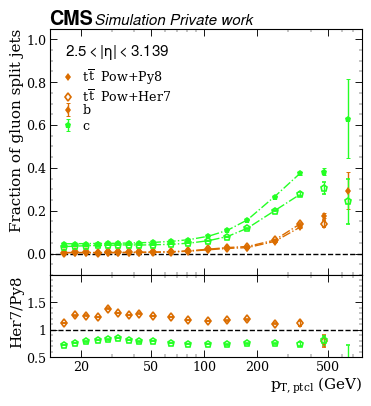

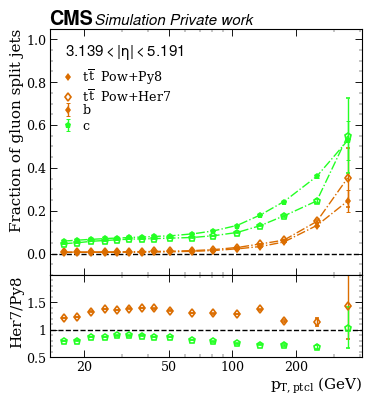

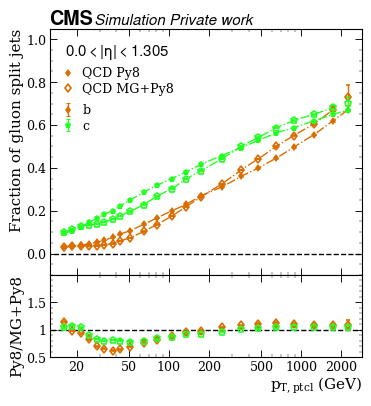

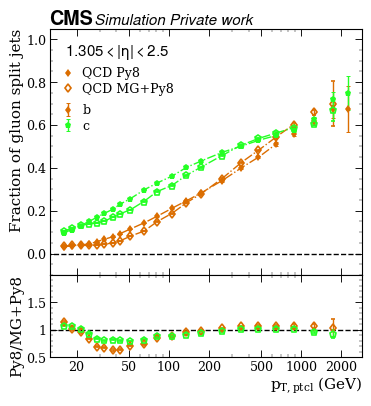

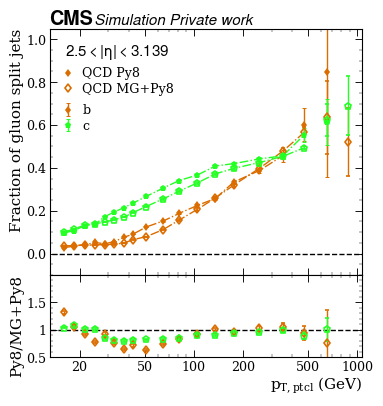

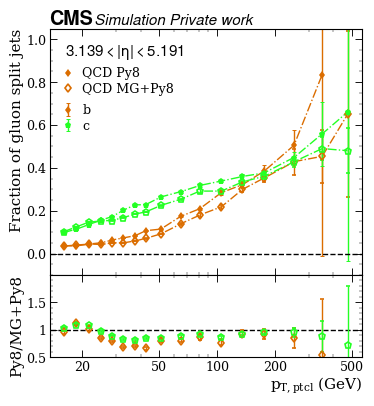

In [15]:
from fileNames.available_datasets import legend_labels

eta_idx = jeteta_bins.get_bin_idx(0)
ndraw = jeteta_bins.nbins # if include_unmatched==True else 1
samples = ['QCD', 'DY', 'TTBAR', 'QCDPy8']
Her_samples = ['QCD-MG-Her', 'DY-MG-Her', 'Herwig-TTBAR', 'QCD-MG-Py']
Py_samples = ['QCD-MG-Py', 'DY-MG-Py', 'Pythia-TTBAR', 'QCD-Py']

Her_legends = ['QCD MG+Her7', 'DY MG+Her7', legend_labels["ttbar"]["lab"]+' Pow+Her7', 'QCD MG+Py8']
Py_legends = ['QCD MG+Py8', 'DY MG+Py8', legend_labels["ttbar"]["lab"]+' Pow+Py8', 'QCD Py8']

# samples = ['QCD', 'DY', 'TTBAR']
# Her_samples = ['_QCD-MG-Py_3rd_jet', '_DY-MG-Her', '_Herwig-TTBAR']
# Py_samples = ['_QCD-Py_3rd_jet', '_DY-MG-Py', '_Pythia-TTBAR'] #_sel_67ac6c3

qfrac_dict = {}
qfrac_var_dict = {}
qfrac_spline_dict = {}
qfrac_spline_dict2D = {}
legend_labels = []
flavors = ['b_gluon_splitting', 'b_prompt', 'c_gluon_splitting', 'c_prompt']
# if not combine_antiflavour:
#     flavors = get_flavor_antiflavor_list(flavors)
flavors_to_obtain = flavors
    
saveplot = False

for ii in range(len(samples)):
# for ii in range(1):
    sampHer = Her_samples[ii]
    sampPy = Py_samples[ii]
    legenddict = {sampPy:Py_legends[ii], sampHer:Her_legends[ii] }
    samp = samples[ii]
    sample_plot = {}
    hists_rebinned_dict = {}
    
    for sample in [sampHer, sampPy]:
#     for sample in ['QCD-Py_genwt', 'QCD-MG-Py', 'QCD-Py']:
        output = get_output(sample)
        file_dict, legend_label = get_xsec_dict(sample, dataset_dictionary)
        output = sum_output(output, sample, file_dict)
        hists = combine_flavors(output, flavors_to_obtain, sumeta=False, combine_antiflavour=True)
#         check_bins(hists[flavors[0]], jeteta_bins, pt_bins)
            
        hists_rebinned = {flav: rebin_hist(sum_neg_pos_eta(hists[flav]), 'jeteta', jeteta_bins.edges) for flav in hists.keys() }
#         if include_unmatched==False: #recalculate the all
#         hists_rebinned['all'] = sum([hists_rebinned[flav] for flav in flavors])
        hists_rebinned_dict[sample] = hists_rebinned
        hists_vals = {}
        for flav in hists_rebinned.keys():
            vals = hists_rebinned[flav].values().copy()
            vals[vals==0] = np.nan
            hists_vals[flav] = vals
#         if combine_antiflavour:
#             qfracs = {flav: hists_vals[flav]/hists_vals['all'] for flav in flavors}
#             qfrac_var_all = hists_rebinned['all'].variances()/hists_vals['all']**2
#             qfrac_var = {}
#             for flav in flavors:
#                 qfrac_var[flav] = qfracs[flav]**2*(hists_rebinned[flav].variances()/hists_vals[flav]**2 + qfrac_var_all**2)
#         else:
        qfracs = {}
        qfrac_var = {}
#         for flav, flav2 in zip(['b_gluon_splitting', 'c_gluon_splitting'], ['b_prompt', 'c_prompt']):
        for flav in ['b', 'c']:
            flav0 = flav+'_gluon_splitting'
            flav1 = flav+'_prompt'
#             aflav = flav+'bar'
            hist_all = hists_vals[flav0]+hists_vals[flav1]
            qfrac_var_all = (hists_rebinned[flav0]+hists_rebinned[flav1]).variances()/hist_all**2
#             for flavii in [flav, flav2]:
            qfracs[flav] = hists_vals[flav0]/hist_all
#                     qfracs[aflav] = hists_vals[aflav]/hist_all
            qfrac_var[flav] = qfracs[flav]**2*(hists_rebinned[flav1].variances()/hists_vals[flav1]**2 + qfrac_var_all**2)
    
        Efrac_splines = {key: 
                         np.array([get_spline(qfracs[key][:,eta_idx], pt_bins) 
                          for eta_idx in range(jeteta_bins.nbins)
                         ])
                        for key in qfracs.keys()
                        }
        Efrac_2Dsplines = {key: RegularGridInterpolator((np.log10(pt_bins.centres), jeteta_bins.centres), qfracs[key], fill_value=None) 
                          for key in qfracs.keys()}
        
#         yval = qfracs['g'][:,0]

#         Efrac_fit_dict[sample] = Efrac_fits
        qfrac_dict[sample] = qfracs
        qfrac_var_dict[sample] = qfrac_var
        zero_spline = get_spline(np.array([1e-15]*pt_bins.nbins), pt_bins)
        
#         qfrac_spline_dict2D[sample] = Efrac_2Dsplines
        sample_plot[sample] = [qfracs, qfrac_var, Efrac_splines, Efrac_2Dsplines]
        legend_labels.append(legend_label) if sample != 'QCD-Py_genwt' else legend_labels.append(legend_label+', weights')

    for eta_idx in range(ndraw):
#     for eta_idx in range(1):
#         plot_Efractions_ratio(sample_plot, [sampPy, sampHer], eta_idx, jeteta_bins, pt_bins, legenddict=legenddict, saveplot=True,
#                              legend1_loc=(0.53, 0.82), legend2_loc=(0.53, 1)
#                              )
        
#         sample_plot_new = {}
# #                 aflav = flav+'bar'
#         for key in sample_plot:
#             lis = []
#             for var in sample_plot[key]:
# #                     sample_plot[key]
#                 lis.append({flav:var[flav]  for flav in flavors_orig})
#             sample_plot_new[key] = lis
        if 'QCDPy8' in samp:
            ratio_title="Py8/MG+Py8"
        else:
            ratio_title="Her7/Py8"
        fig_name = 'fig/fractions/fraction_g_split_'+jeteta_bins.idx2str(eta_idx)+"_"+"_".join([sampPy, sampHer])
#         legenddict2 = {'b': 'b gluon split/(b)', 'c': 'c gluon split/(c gluon split + c prompt)'}
        plot_Efractions_ratio(sample_plot, [sampPy, sampHer], eta_idx, jeteta_bins, pt_bins, legenddict=legenddict, #legenddict2=legenddict2,
                          saveplot=True, legend2_loc=(0.02, 0.88), legend1_loc=(0.02, 0.73), ratio_lim=(0.6,2.0), fig_name=fig_name, ylab_name='Fraction of gluon split jets',
                             ratio_title=ratio_title, ylim=(-0.1,1.05))

#     if saveplot:
#         json_filename = 'out_txt/flavor_fractions_'+'_'.join([sampHer, sampPy])+eta_binning_str+'.json'
#         save_json_fractions(sample_plot, pt_bins, jeteta_bins, json_filename)
#         root_filename = 'out_txt/flavor_fractions_'+'_'.join([sampHer, sampPy])+eta_binning_str+'.root'
#         save_fractions_root(sample_plot, pt_bins, jeteta_bins, root_filename)

# if add_composed_flav:
#     flavors=flavors[:3]+['q']+flavors[3:] if True else flavors+['q', 'qbar'] 

In [8]:
# from fileNames.available_datasets import legend_labels

# eta_idx = jeteta_bins.get_bin_idx(0)
# ndraw = jeteta_bins.nbins # if include_unmatched==True else 1
# samples = ['QCD']
# Her_samples = ['QCD-MG-Py']
# Py_samples = ['QCD-Py']

# Her_legends = ['QCD MG+Py8']
# Py_legends = ['QCD Py8']

# # samples = ['QCD', 'DY', 'TTBAR']
# # Her_samples = ['_QCD-MG-Py_3rd_jet', '_DY-MG-Her', '_Herwig-TTBAR']
# # Py_samples = ['_QCD-Py_3rd_jet', '_DY-MG-Py', '_Pythia-TTBAR'] #_sel_67ac6c3

# qfrac_dict = {}
# qfrac_var_dict = {}
# qfrac_spline_dict = {}
# qfrac_spline_dict2D = {}
# legend_labels = []
# flavors = ['b_gluon_splitting', 'b_prompt']
# # if not combine_antiflavour:
# #     flavors = get_flavor_antiflavor_list(flavors)
# flavors_to_obtain = flavors
    
# saveplot = False

# for ii in range(len(samples)):
#     sampHer = Her_samples[ii]
#     sampPy = Py_samples[ii]
#     legenddict = {sampPy:Py_legends[ii], sampHer:Her_legends[ii] }
#     samp = samples[ii]
#     sample_plot = {}
#     hists_rebinned_dict = {}
    
#     for sample in [sampHer, sampPy]:
# #     for sample in ['QCD-Py_genwt', 'QCD-MG-Py', 'QCD-Py']:
#         output = get_output(sample)
#         file_dict, legend_label = get_xsec_dict(sample, dataset_dictionary)
#         output = sum_output(output, sample, file_dict)
#         hists = combine_flavors(output, flavors_to_obtain, sumeta=False, combine_antiflavour=True)
# #         check_bins(hists[flavors[0]], jeteta_bins, pt_bins)
            
#         hists_rebinned = {flav: rebin_hist(sum_neg_pos_eta(hists[flav]), 'jeteta', jeteta_bins.edges) for flav in hists.keys() }
# #         if include_unmatched==False: #recalculate the all
#         hists_rebinned['all'] = sum([hists_rebinned[flav] for flav in flavors])
#         hists_rebinned_dict[sample] = hists_rebinned
#         hists_vals = {}
#         for flav in hists_rebinned.keys():
#             vals = hists_rebinned[flav].values().copy()
#             vals[vals==0] = np.nan
#             hists_vals[flav] = vals
#         qfracs = {flav: hists_vals[flav]/hists_vals['all'] for flav in flavors}
# #         qfracs_var = {flav: hists_rebinned[flav].variances()/hists_rebinned['all'].variances() for flav in flavors}
#         qfrac_var_all = hists_rebinned['all'].variances()/hists_vals['all']**2
#         qfrac_var = {}
#         for flav in flavors:
#             qfrac_var[flav] = qfracs[flav]**2*(hists_rebinned[flav].variances()/hists_vals[flav]**2 + qfrac_var_all**2)
#         Efrac_splines = {key: 
#                          np.array([get_spline(qfracs[key][:,eta_idx], pt_bins) 
#                           for eta_idx in range(jeteta_bins.nbins)
#                          ])
#                         for key in qfracs.keys()
#                         }
#         Efrac_2Dsplines = {key: RegularGridInterpolator((np.log10(pt_bins.centres), jeteta_bins.centres), qfracs[key], fill_value=None) 
#                           for key in qfracs.keys()}
        
# #         yval = qfracs['g'][:,0]

# #         Efrac_fit_dict[sample] = Efrac_fits
#         qfrac_dict[sample] = qfracs
#         qfrac_var_dict[sample] = qfrac_var
#         zero_spline = get_spline(np.array([1e-15]*pt_bins.nbins), pt_bins)
#         if add_composed_flav:
#             Efrac_splines['q'] = np.array([zero_spline]*jeteta_bins.nbins)
#             if not True:
#                 Efrac_splines['qbar'] = np.array([zero_spline]*jeteta_bins.nbins)
#             qfrac_spline_dict[sample] = FlavorFractions(Efrac_splines, eta_binning) #Efrac_splines #Efrac_2Dsplines
# #         qfrac_spline_dict2[sample] = Efrac_splines
        
#         qfrac_spline_dict2D[sample] = Efrac_2Dsplines
#         sample_plot[sample] = [qfracs, qfrac_var, Efrac_splines, Efrac_2Dsplines]
#         legend_labels.append(legend_label) if sample != 'QCD-Py_genwt' else legend_labels.append(legend_label+', weights')

#     for eta_idx in range(ndraw):
#         plot_Efractions_ratio(sample_plot, [sampHer, sampPy], eta_idx, jeteta_bins, pt_bins, legenddict=legenddict, saveplot=True,
#                              legend1_loc=(0.53, 0.82), legend2_loc=(0.53, 1), ratio_title="Py8/MG+Py8"
#                              )
# #     if saveplot:
# #         json_filename = 'out_txt/flavor_fractions_'+'_'.join([sampHer, sampPy])+eta_binning_str+'.json'
# #         save_json_fractions(sample_plot, pt_bins, jeteta_bins, json_filename)
# #         root_filename = 'out_txt/flavor_fractions_'+'_'.join([sampHer, sampPy])+eta_binning_str+'.root'
# #         save_fractions_root(sample_plot, pt_bins, jeteta_bins, root_filename)

# if add_composed_flav:
#     flavors=flavors[:3]+['q']+flavors[3:] if True else flavors+['q', 'qbar'] 

Saving plot with the name =  fig/fractions/fraction_eta0p0to1p305_QCD-MG-Py_QCD-MG-Her
Saving plot with the name =  fig/fractions/fraction_eta1p305to2p5_QCD-MG-Py_QCD-MG-Her
Saving plot with the name =  fig/fractions/fraction_eta2p5to3p139_QCD-MG-Py_QCD-MG-Her
Saving plot with the name =  fig/fractions/fraction_eta3p139to5p191_QCD-MG-Py_QCD-MG-Her
Saving plot with the name =  fig/fractions/fraction_eta0p0to1p305_DY-MG-Py_DY-MG-Her
Saving plot with the name =  fig/fractions/fraction_eta1p305to2p5_DY-MG-Py_DY-MG-Her
Saving plot with the name =  fig/fractions/fraction_eta2p5to3p139_DY-MG-Py_DY-MG-Her
Saving plot with the name =  fig/fractions/fraction_eta3p139to5p191_DY-MG-Py_DY-MG-Her
Saving plot with the name =  fig/fractions/fraction_eta0p0to1p305_Pythia-TTBAR_Herwig-TTBAR
Saving plot with the name =  fig/fractions/fraction_eta1p305to2p5_Pythia-TTBAR_Herwig-TTBAR
Saving plot with the name =  fig/fractions/fraction_eta2p5to3p139_Pythia-TTBAR_Herwig-TTBAR
Saving plot with the name =  fig

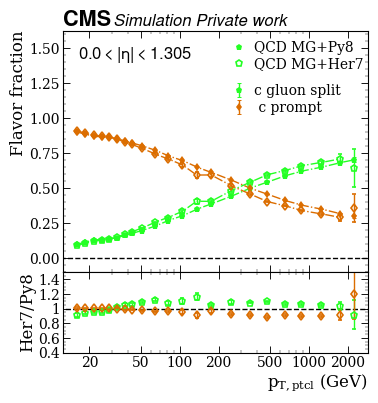

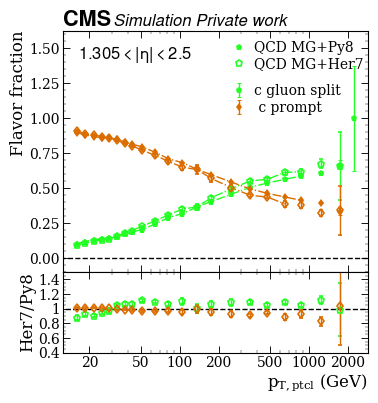

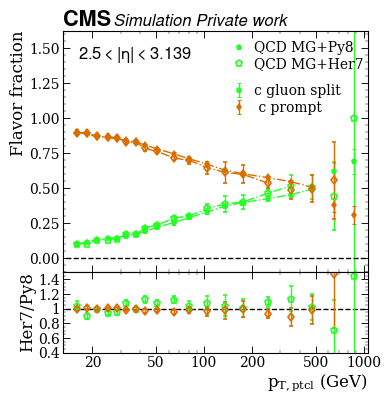

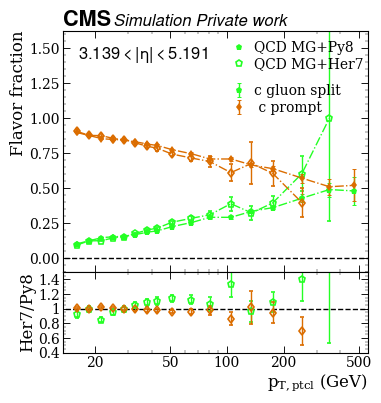

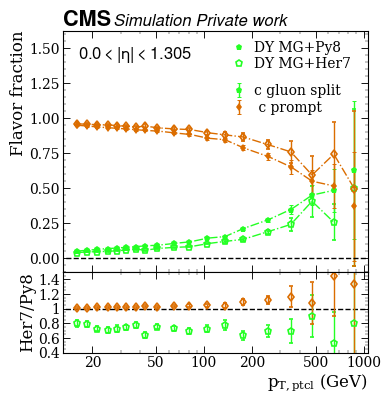

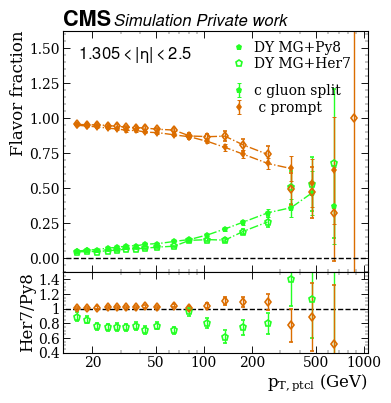

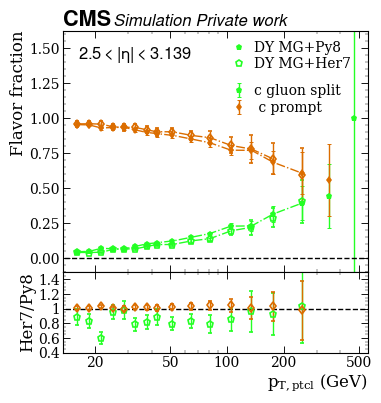

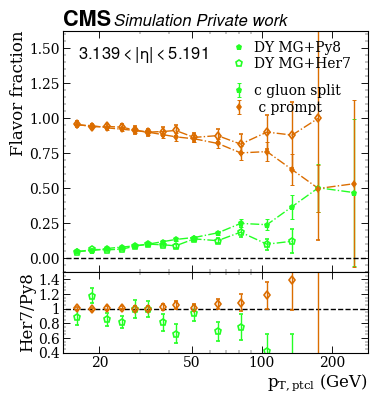

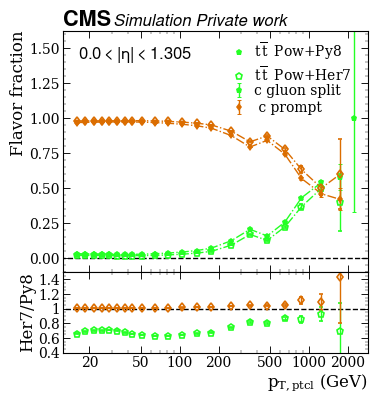

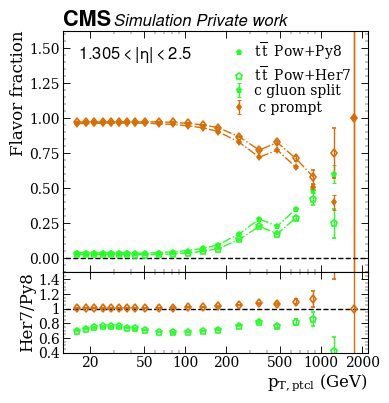

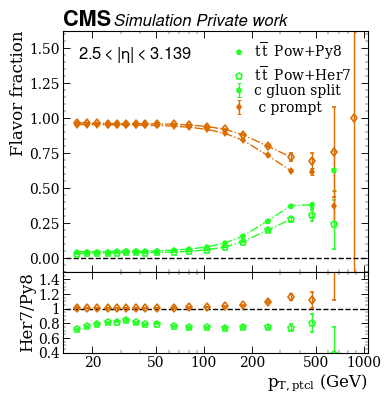

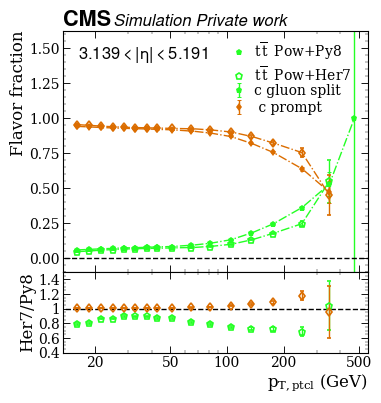

In [21]:
from fileNames.available_datasets import legend_labels

eta_idx = jeteta_bins.get_bin_idx(0)
ndraw =  jeteta_bins.nbins # if include_unmatched==True else 1
samples = ['QCD', 'DY', 'TTBAR']
Her_samples = ['QCD-MG-Her', 'DY-MG-Her', 'Herwig-TTBAR']
Py_samples = ['QCD-MG-Py', 'DY-MG-Py', 'Pythia-TTBAR']

Her_legends = ['QCD MG+Her7', 'DY MG+Her7', legend_labels["ttbar"]["lab"]+' Pow+Her7']
Py_legends = ['QCD MG+Py8', 'DY MG+Py8', legend_labels["ttbar"]["lab"]+' Pow+Py8']

# samples = ['QCD', 'DY', 'TTBAR']
# Her_samples = ['_QCD-MG-Py_3rd_jet', '_DY-MG-Her', '_Herwig-TTBAR']
# Py_samples = ['_QCD-Py_3rd_jet', '_DY-MG-Py', '_Pythia-TTBAR'] #_sel_67ac6c3

qfrac_dict = {}
qfrac_var_dict = {}
qfrac_spline_dict = {}
qfrac_spline_dict2D = {}
legend_labels = []
flavors = ['c_gluon_splitting', 'c_prompt']
# if not combine_antiflavour:
#     flavors = get_flavor_antiflavor_list(flavors)
flavors_to_obtain = flavors
    
saveplot = False

for ii in range(len(samples)):
    sampHer = Her_samples[ii]
    sampPy = Py_samples[ii]
    legenddict = {sampPy:Py_legends[ii], sampHer:Her_legends[ii] }
    samp = samples[ii]
    sample_plot = {}
    hists_rebinned_dict = {}
    
    for sample in [sampHer, sampPy]:
#     for sample in ['QCD-Py_genwt', 'QCD-MG-Py', 'QCD-Py']:
        output = get_output(sample)
        file_dict, legend_label = get_xsec_dict(sample, dataset_dictionary)
        output = sum_output(output, sample, file_dict)
        hists = combine_flavors(output, flavors_to_obtain, sumeta=False, combine_antiflavour=True)
#         check_bins(hists[flavors[0]], jeteta_bins, pt_bins)
            
        hists_rebinned = {flav: rebin_hist(sum_neg_pos_eta(hists[flav]), 'jeteta', jeteta_bins.edges) for flav in hists.keys() }
#         if include_unmatched==False: #recalculate the all
        hists_rebinned['all'] = sum([hists_rebinned[flav] for flav in flavors])
        hists_rebinned_dict[sample] = hists_rebinned
        hists_vals = {}
        for flav in hists_rebinned.keys():
            vals = hists_rebinned[flav].values().copy()
            vals[vals==0] = np.nan
            hists_vals[flav] = vals
        qfracs = {flav: hists_vals[flav]/hists_vals['all'] for flav in flavors}
#         qfracs_var = {flav: hists_rebinned[flav].variances()/hists_rebinned['all'].variances() for flav in flavors}
        qfrac_var_all = hists_rebinned['all'].variances()/hists_vals['all']**2
        qfrac_var = {}
        for flav in flavors:
            qfrac_var[flav] = qfracs[flav]**2*(hists_rebinned[flav].variances()/hists_vals[flav]**2 + qfrac_var_all**2)
        Efrac_splines = {key: 
                         np.array([get_spline(qfracs[key][:,eta_idx], pt_bins) 
                          for eta_idx in range(jeteta_bins.nbins)
                         ])
                        for key in qfracs.keys()
                        }
        Efrac_2Dsplines = {key: RegularGridInterpolator((np.log10(pt_bins.centres), jeteta_bins.centres), qfracs[key], fill_value=None) 
                          for key in qfracs.keys()}
        
#         yval = qfracs['g'][:,0]

#         Efrac_fit_dict[sample] = Efrac_fits
        qfrac_dict[sample] = qfracs
        qfrac_var_dict[sample] = qfrac_var
        zero_spline = get_spline(np.array([1e-15]*pt_bins.nbins), pt_bins)
        if add_composed_flav:
            Efrac_splines['q'] = np.array([zero_spline]*jeteta_bins.nbins)
            if not True:
                Efrac_splines['qbar'] = np.array([zero_spline]*jeteta_bins.nbins)
            qfrac_spline_dict[sample] = FlavorFractions(Efrac_splines, eta_binning) #Efrac_splines #Efrac_2Dsplines
#         qfrac_spline_dict2[sample] = Efrac_splines
        
        qfrac_spline_dict2D[sample] = Efrac_2Dsplines
        sample_plot[sample] = [qfracs, qfrac_var, Efrac_splines, Efrac_2Dsplines]
        legend_labels.append(legend_label) if sample != 'QCD-Py_genwt' else legend_labels.append(legend_label+', weights')

    for eta_idx in range(ndraw):
        plot_Efractions_ratio(sample_plot, [sampPy, sampHer], eta_idx, jeteta_bins, pt_bins, legenddict=legenddict, saveplot=True,
                                 legend1_loc=(0.53, 0.82), legend2_loc=(0.53, 1)
                             )
#     if saveplot:
#         json_filename = 'out_txt/flavor_fractions_'+'_'.join([sampHer, sampPy])+eta_binning_str+'.json'
#         save_json_fractions(sample_plot, pt_bins, jeteta_bins, json_filename)
#         root_filename = 'out_txt/flavor_fractions_'+'_'.join([sampHer, sampPy])+eta_binning_str+'.root'
#         save_fractions_root(sample_plot, pt_bins, jeteta_bins, root_filename)

if add_composed_flav:
    flavors=flavors[:3]+['q']+flavors[3:] if True else flavors+['q', 'qbar'] 

Saving plot with the name =  fig/fractions/fraction_eta0p0to1p305_QCD-MG-Py_QCD-Py
Saving plot with the name =  fig/fractions/fraction_eta1p305to2p5_QCD-MG-Py_QCD-Py
Saving plot with the name =  fig/fractions/fraction_eta2p5to3p139_QCD-MG-Py_QCD-Py
Saving plot with the name =  fig/fractions/fraction_eta3p139to5p191_QCD-MG-Py_QCD-Py


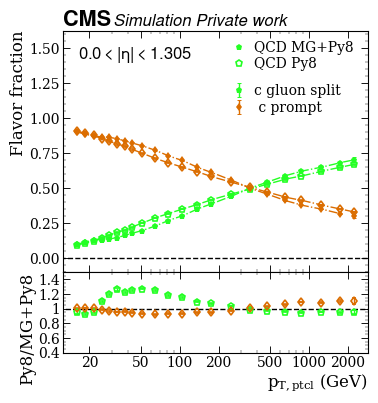

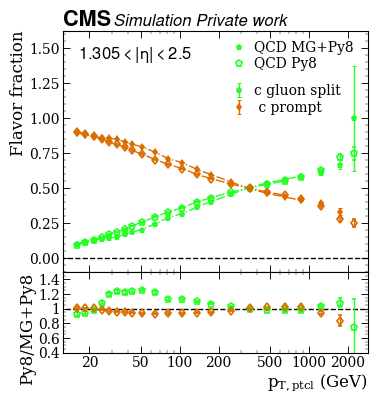

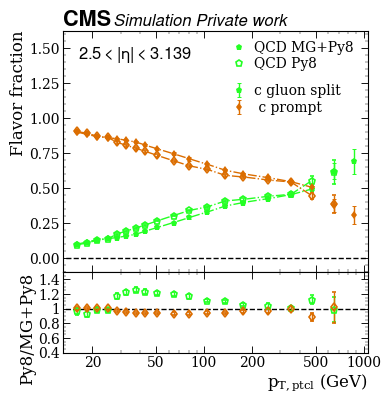

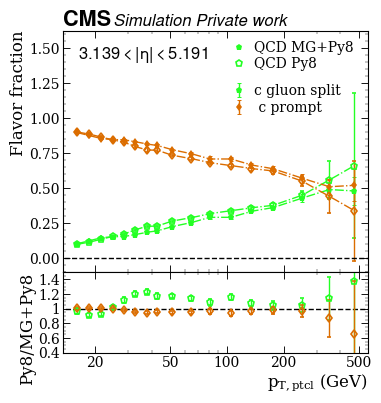

In [23]:
from fileNames.available_datasets import legend_labels

eta_idx = jeteta_bins.get_bin_idx(0)
ndraw = 1 # jeteta_bins.nbins # if include_unmatched==True else 1
samples = ['QCD']
Her_samples = ['QCD-MG-Py']
Py_samples = ['QCD-Py']

Her_legends = ['QCD MG+Py8']
Py_legends = ['QCD Py8']

# samples = ['QCD', 'DY', 'TTBAR']
# Her_samples = ['_QCD-MG-Py_3rd_jet', '_DY-MG-Her', '_Herwig-TTBAR']
# Py_samples = ['_QCD-Py_3rd_jet', '_DY-MG-Py', '_Pythia-TTBAR'] #_sel_67ac6c3

qfrac_dict = {}
qfrac_var_dict = {}
qfrac_spline_dict = {}
qfrac_spline_dict2D = {}
legend_labels = []
flavors = ['c_gluon_splitting', 'c_prompt']
# if not combine_antiflavour:
#     flavors = get_flavor_antiflavor_list(flavors)
flavors_to_obtain = flavors
    
saveplot = False

for ii in range(len(samples)):
    sampHer = Her_samples[ii]
    sampPy = Py_samples[ii]
    legenddict = {sampPy:Py_legends[ii], sampHer:Her_legends[ii] }
    samp = samples[ii]
    sample_plot = {}
    hists_rebinned_dict = {}
    
    for sample in [sampHer, sampPy]:
#     for sample in ['QCD-Py_genwt', 'QCD-MG-Py', 'QCD-Py']:
        output = get_output(sample)
        file_dict, legend_label = get_xsec_dict(sample, dataset_dictionary)
        output = sum_output(output, sample, file_dict)
        hists = combine_flavors(output, flavors_to_obtain, sumeta=False, combine_antiflavour=True)
#         check_bins(hists[flavors[0]], jeteta_bins, pt_bins)
            
        hists_rebinned = {flav: rebin_hist(sum_neg_pos_eta(hists[flav]), 'jeteta', jeteta_bins.edges) for flav in hists.keys() }
#         if include_unmatched==False: #recalculate the all
        hists_rebinned['all'] = sum([hists_rebinned[flav] for flav in flavors])
        hists_rebinned_dict[sample] = hists_rebinned
        hists_vals = {}
        for flav in hists_rebinned.keys():
            vals = hists_rebinned[flav].values().copy()
            vals[vals==0] = np.nan
            hists_vals[flav] = vals
        qfracs = {flav: hists_vals[flav]/hists_vals['all'] for flav in flavors}
#         qfracs_var = {flav: hists_rebinned[flav].variances()/hists_rebinned['all'].variances() for flav in flavors}
        qfrac_var_all = hists_rebinned['all'].variances()/hists_vals['all']**2
        qfrac_var = {}
        for flav in flavors:
            qfrac_var[flav] = qfracs[flav]**2*(hists_rebinned[flav].variances()/hists_vals[flav]**2 + qfrac_var_all**2)
        Efrac_splines = {key: 
                         np.array([get_spline(qfracs[key][:,eta_idx], pt_bins) 
                          for eta_idx in range(jeteta_bins.nbins)
                         ])
                        for key in qfracs.keys()
                        }
        Efrac_2Dsplines = {key: RegularGridInterpolator((np.log10(pt_bins.centres), jeteta_bins.centres), qfracs[key], fill_value=None) 
                          for key in qfracs.keys()}
        
#         yval = qfracs['g'][:,0]

#         Efrac_fit_dict[sample] = Efrac_fits
        qfrac_dict[sample] = qfracs
        qfrac_var_dict[sample] = qfrac_var
        zero_spline = get_spline(np.array([1e-15]*pt_bins.nbins), pt_bins)
        if add_composed_flav:
            Efrac_splines['q'] = np.array([zero_spline]*jeteta_bins.nbins)
            if not True:
                Efrac_splines['qbar'] = np.array([zero_spline]*jeteta_bins.nbins)
            qfrac_spline_dict[sample] = FlavorFractions(Efrac_splines, eta_binning) #Efrac_splines #Efrac_2Dsplines
#         qfrac_spline_dict2[sample] = Efrac_splines
        
        qfrac_spline_dict2D[sample] = Efrac_2Dsplines
        sample_plot[sample] = [qfracs, qfrac_var, Efrac_splines, Efrac_2Dsplines]
        legend_labels.append(legend_label) if sample != 'QCD-Py_genwt' else legend_labels.append(legend_label+', weights')

    for eta_idx in range(ndraw):
        plot_Efractions_ratio(sample_plot, [sampHer, sampPy], eta_idx, jeteta_bins, pt_bins, legenddict=legenddict, saveplot=True,
                                 legend1_loc=(0.53, 0.82), legend2_loc=(0.53, 1), ratio_title="Py8/MG+Py8"
                             )
#     if saveplot:
#         json_filename = 'out_txt/flavor_fractions_'+'_'.join([sampHer, sampPy])+eta_binning_str+'.json'
#         save_json_fractions(sample_plot, pt_bins, jeteta_bins, json_filename)
#         root_filename = 'out_txt/flavor_fractions_'+'_'.join([sampHer, sampPy])+eta_binning_str+'.root'
#         save_fractions_root(sample_plot, pt_bins, jeteta_bins, root_filename)

if add_composed_flav:
    flavors=flavors[:3]+['q']+flavors[3:] if True else flavors+['q', 'qbar'] 